In [13]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [14]:
def fk(q1, q2, q3):
    """Forward kinematics:  (q1,q2,q3)  → (x,y,z)"""
    x = q3 * np.cos(q2) * np.cos(q1)
    y = q3 * np.cos(q2) * np.sin(q1)
    z = q3 * np.sin(q2)
    return np.array([x, y, z])

def ik(x, y, z):
    """Inverse kinematics:  (x,y,z) → (q1,q2,q3)"""
    q3 = np.sqrt(x**2 + y**2 + z**2)
    q1 = np.arctan2(y, x)               # yaw
    q2 = np.arctan2(z, np.hypot(x, y))  # pitch
    return np.array([q1, q2, q3])

In [15]:
N   = 1_000_0          # number of Monte-Carlo samples
R_MIN, R_MAX = 0.10, 0.40   # prismatic limits [m]
err = []

xyz_all = []
for _ in range(N):
    # random joint config in the mechanical range
    q1_r = np.random.uniform(-np.pi, np.pi)         # unrestricted yaw
    q2_r = np.random.uniform(-np.pi/2, np.pi/2)     # ±90° pitch
    q3_r = np.random.uniform(R_MIN, R_MAX)          # extension
    xyz   = fk(q1_r, q2_r, q3_r)                    # FK
    q1_i, q2_i, q3_i = ik(*xyz)                     # IK
    xyz_rec = fk(q1_i, q2_i, q3_i)                  # FK∘IK
    err.append(np.linalg.norm(xyz - xyz_rec))
    xyz_all.append(xyz)

print(f"Mean |FK∘IK − I| error over {N} poses: {np.mean(err):.2e} m")


Mean |FK∘IK − I| error over 10000 poses: 1.12e-17 m


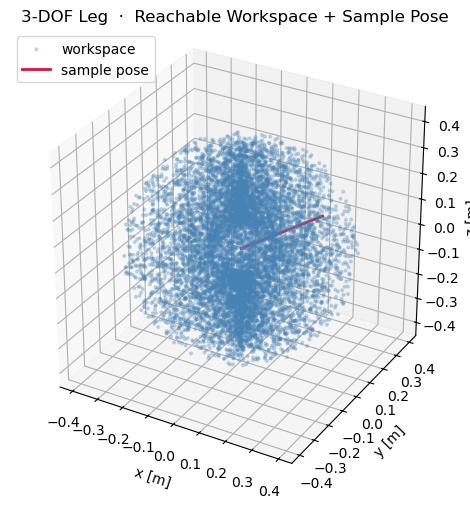

In [16]:
xyz_all = np.array(xyz_all)

fig = plt.figure(figsize=(6, 5))
ax  = fig.add_subplot(111, projection='3d')

# Workspace scatter
ax.scatter(xyz_all[:, 0], xyz_all[:, 1], xyz_all[:, 2],
           s=4, alpha=0.25, color='steelblue', label='workspace')

# Plot a single pose (stick figure) for illustration
# Option B – unpack all three at once
q1_demo, q2_demo, q3_demo = (*np.deg2rad([30, 25]), 0.30)

hip = np.array([0, 0, 0])          # hip at origin
foot = fk(q1_demo, q2_demo, q3_demo)
ax.plot([hip[0], foot[0]], [hip[1], foot[1]], [hip[2], foot[2]],
        c='crimson', lw=2, label='sample pose')

# Axis styling
ax.set_xlabel('x [m]'); ax.set_ylabel('y [m]'); ax.set_zlabel('z [m]')
ax.set_title('3-DOF Leg  ·  Reachable Workspace + Sample Pose')
ax.legend(loc='upper left')
ax.set_box_aspect([1, 1, 1])       # equal aspect
plt.tight_layout()
plt.show()
